In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


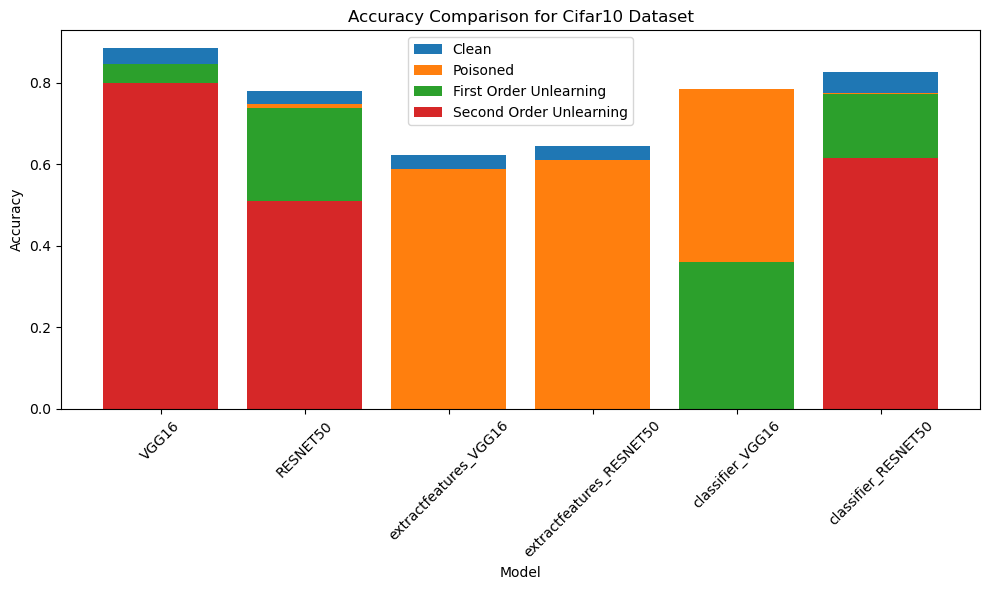

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'all_results.csv' contains your data
df = pd.read_csv('all_results.csv')

# List of datasets to process
datasets = ['Cifar10', 'Cifar100', 'SVHN']

# Initialize a dictionary to store merged results for each dataset
merged_results = {}

# Loop through each dataset
for dataset in datasets:
    # Filter data for the current dataset
    df_dataset = df[df['Dataset'] == dataset]
    
    # Filter data for each phase
    df_clean = df_dataset[df_dataset['Phase'] == 'clean']
    df_poisoned = df_dataset[df_dataset['Phase'] == 'poisoned']
    df_first_order_unlearning = df_dataset[df_dataset['Phase'] == 'first_order_unlearning']
    df_second_order_unlearning = df_dataset[df_dataset['Phase'] == 'second_order_unlearning']
    
    # Merge dataframes for different phases
    df_merged = pd.merge(df_clean, df_poisoned, on='Model', suffixes=('_clean', '_poisoned'))
    df_merged = pd.merge(df_merged, df_first_order_unlearning, on='Model', how='outer', suffixes=('', '_first_order_unlearning'))
    df_merged = pd.merge(df_merged, df_second_order_unlearning, on='Model', how='outer', suffixes=('', '_second_order_unlearning'))
    
    # Drop unnecessary columns
    df_merged = df_merged.drop(columns=['Dataset_clean', 'Dataset_poisoned', 'Dataset', 'Dataset_second_order_unlearning',
                                        'Phase', 'Phase_clean', 'Phase_poisoned', 'Phase_second_order_unlearning'])
    
    # Rename columns
    df_merged.columns = ['Model', 'Clean', 'Poisoned', 'FO_unlearning', 'SO_unlearning']
    
    # Store merged results for the current dataset
    merged_results[dataset] = df_merged

# Example of plotting for Cifar10 dataset
dataset_name = 'Cifar10'
df_plot = merged_results[dataset_name]

plt.figure(figsize=(10, 6))
plt.bar(df_plot['Model'], df_plot['Clean'], label='Clean')
plt.bar(df_plot['Model'], df_plot['Poisoned'], label='Poisoned')
plt.bar(df_plot['Model'], df_plot['FO_unlearning'], label='First Order Unlearning')
plt.bar(df_plot['Model'], df_plot['SO_unlearning'], label='Second Order Unlearning')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Comparison for {dataset_name} Dataset')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Assuming 'all_results.csv' contains your data
df = pd.read_csv('all_results.csv')

# List of datasets to process
datasets = ['Cifar10', 'Cifar100', 'SVHN']

# Initialize a dictionary to store merged results for each dataset
merged_results = {}

# Loop through each dataset
for dataset in datasets:
    # Filter data for the current dataset
    df_dataset = df[df['Dataset'] == dataset]
    
    # Filter data for each phase
    df_clean = df_dataset[df_dataset['Phase'] == 'clean']
    df_poisoned = df_dataset[df_dataset['Phase'] == 'poisoned']
    df_first_order_unlearning = df_dataset[df_dataset['Phase'] == 'first_order_unlearning']
    df_second_order_unlearning = df_dataset[df_dataset['Phase'] == 'second_order_unlearning']
    
    # Merge dataframes for different phases
    df_merged = pd.merge(df_clean, df_poisoned, on='Model', suffixes=('_clean', '_poisoned'))
    df_merged = pd.merge(df_merged, df_first_order_unlearning, on='Model', how='outer', suffixes=('', '_first_order_unlearning'))
    df_merged = pd.merge(df_merged, df_second_order_unlearning, on='Model', how='outer', suffixes=('', '_second_order_unlearning'))
    
    # Drop unnecessary columns
    df_merged = df_merged.drop(columns=['Dataset_clean', 'Dataset_poisoned', 'Dataset', 'Dataset_second_order_unlearning',
                                        'Phase', 'Phase_clean', 'Phase_poisoned', 'Phase_second_order_unlearning'])
    
    # Rename columns
    df_merged.columns = ['Model', 'Clean', 'Poisoned', 'FO_unlearning', 'SO_unlearning']
    
    # Store merged results for the current dataset
    merged_results[dataset] = df_merged

# Display the merged results as tables
for dataset, df_result in merged_results.items():
    print(f"\nDataset: {dataset}")
    print(df_result)



Dataset: Cifar10
                      Model   Clean  Poisoned  FO_unlearning  SO_unlearning
0                     VGG16  0.8840    0.8436         0.8448         0.8000
1                  RESNET50  0.7788    0.7478         0.7384         0.5084
2     extractfeatures_VGG16  0.6224    0.5874            NaN            NaN
3  extractfeatures_RESNET50  0.6442    0.6108            NaN            NaN
4          classifier_VGG16  0.6168    0.7850         0.3588            NaN
5       classifier_RESNET50  0.8268    0.7736         0.7720         0.6138

Dataset: Cifar100
                      Model   Clean  Poisoned  FO_unlearning  SO_unlearning
0                     VGG16  0.6148    0.6082         0.6100         0.5878
1                  RESNET50  0.4564    0.4370         0.4370         0.4242
2     extractfeatures_VGG16  0.3096    0.3046            NaN            NaN
3  extractfeatures_RESNET50  0.3372    0.3528            NaN            NaN
4          classifier_VGG16  0.3100    0.3096      

| Dataset: Cifar10 | Model                     |   Clean |   Poisoned |   FO_unlearning |   SO_unlearning |
|------------------|---------------------------|---------|------------|-----------------|-----------------|
|                  | VGG16                     |  0.884  |     0.8436 |          0.8448 |           0.8   |
|                  | RESNET50                  |  0.7788 |     0.7478 |          0.7384 |           0.5084|
|                  | extractfeatures_VGG16     |  0.6224 |     0.5874 |             NaN |           NaN   |
|                  | extractfeatures_RESNET50  |  0.6442 |     0.6108 |             NaN |           NaN   |
|                  | classifier_VGG16          |  0.6168 |     0.785  |          0.3588 |           NaN   |
|                  | classifier_RESNET50       |  0.8268 |     0.7736 |          0.772  |           0.6138|

* 

| Dataset: Cifar100 | Model                     |   Clean |   Poisoned |   FO_unlearning |   SO_unlearning |
|-------------------|---------------------------|---------|------------|-----------------|-----------------|
|                   | VGG16                     |  0.6148 |     0.6082 |          0.61   |          0.5878 |
|                   | RESNET50                  |  0.4564 |     0.437  |          0.437  |          0.4242 |
|                   | extractfeatures_VGG16     |  0.3096 |     0.3046 |             NaN |           NaN   |
|                   | extractfeatures_RESNET50  |  0.3372 |     0.3528 |             NaN |           NaN   |
|                   | classifier_VGG16          |  0.31   |     0.3096 |             NaN |           NaN   |
|                   | classifier_RESNET50       |  0.3294 |     0.4756 |          0.4752 |          0.0098|

* 

    
| Dataset: SVHN | Model                     |     Clean |   Poisoned |   FO_unlearning |   SO_unlearning |
|---------------|---------------------------|-----------|------------|-----------------|-----------------|
|               | VGG16                     |  0.959358 |   0.955286 |        0.955824 |        0.81008  |
|               | RESNET50                  |  0.920713 |   0.934542 |        0.934849 |        0.887677 |
|               | extractfeatures_VGG16     |  0.542025 |   0.53634  |             NaN |             NaN |
|               | extractfeatures_RESNET50  |  0.539567 |   0.52858  |             NaN |             NaN |
|               | classifier_VGG16          |  0.557468 |   0.539874 |             NaN |             NaN |
|               | classifier_RESNET50       |  0.832437 |   0.93047  |        0.931162 |        0.917256 |
